In [2]:
import torch
import blob
import torch.nn as nn
import glob
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
print(os.getcwd())

/home/avinash/Desktop/Nose Work/10 sensor sample


In [111]:
path = os.getcwd() +"/ManasLabDay2"

In [112]:
for root, dirs, files in os.walk(data_base_dir, topdown=False):
    print(root)
            

/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Soap1
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Coriander
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Volini
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Clinic_plus2
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Onion
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Cumin_Seeds2
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Polo4
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Background1
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Cardamom3
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Onion2
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Coriander1
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Vicks3
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Volini2
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Background
/home

In [109]:
import os
import pandas as pd
import numpy as np



# print(path_dict['Polo'])

def sample_from_dataframe(df):
    window_len = 100
    sample_arr = np.array(df)
    sample_ls = []
    for i in range(600,3000 - window_len):
        sample_ls.append(sample_arr[i:i+window_len])
    samples = np.stack(sample_ls)
    return samples


def combine_files(path_dict):
    for key in path_dict.keys():
        path_list = path_dict[key]
        samples = []
        for local_path in path_list:
            df = pd.DataFrame()
            files = os.listdir(local_path)
            for file in files:
                file_path = os.path.join(local_path, file)
                local_df = pd.read_csv(file_path)
                df = pd.concat([df, local_df], axis = 0)
                df = df.drop(columns = 'timestamp')
            local_samples = sample_from_dataframe(df)
            samples.append(local_samples)
            # print(len(samples))
            # print(type(samples[0]))
        if len(samples)>1:
            samples = np.concatenate(samples, axis=0)
        else:
            samples = np.array(samples)
        sample_label = np.full((samples.shape[0],),key)
        print(f'{key} data shape: {samples.shape}, label shape: {sample_label.shape}')
        np.savez(f'curated_data/data_{key}.npz', data1=samples, data2=sample_label)
        # cls_df = pd.DataFrame(dir_samples, columns=['voc2','no2','eth','co','temp','pressure','humidity','mq3','mq7','mq9','mq135'])
        # cls_df.loc[:,'label'] = sample_label
        # cls_df.to_csv(f'Combined_sampled_{key}.csv')


if __name__ == '__main__':
    class_list = ['Background','Cardamom','Clinic_plus', 'Garlic', 'Ginger', 'Incense_stick', 'Onion', 'Polo']
    data_dir = path = os.getcwd() +"/ManasLabDay2"
    path_dict = dict()
    data_base_dir = os.path.join(os.getcwd(),data_dir)

    for root, dirs, files in os.walk(data_base_dir, topdown=False):
        for name in dirs:
            for cls_name in class_list:
                if (cls_name in name) or (cls_name is name):
                    if cls_name not in path_dict.keys():
                        path_dict[cls_name] = list()
                    else:
                        local_path = os.path.join(data_base_dir, name)
                        path_dict[cls_name].append(local_path)

    combine_files(path_dict)

    data_curated_dir = 'curated_data'

/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Onion2
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Ginger1
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Onion1
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Ginger
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Incense_stick3
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Incense_stick1
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Cardamom
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Cardamom4
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Polo2
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Cardamom2
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Polo3
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Polo1
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Polo
/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Garlic1
/home/avinash

In [79]:
total_dataset = pd.DataFrame()
data_list = [] 
for i in ["Red_clilli" , "Red_clilli1" , "Red_clilli2", "Red_clilli3", "Red_clilli4"] :
    dataset = pd.DataFrame()
    file_path = os.path.join(path , i )
    for csv_file in os.listdir(file_path):
        data = pd.read_csv(os.path.join(file_path , csv_file))
        data['label'] = i
        dataset = pd.concat([dataset , data] , axis =0 , ignore_index=True)
    dataset = dataset[:6000]
    total_dataset = pd.concat([total_dataset , dataset] , axis = 0  , ignore_index=True)
    
print(total_dataset.shape)
total_dataset.to_csv(f'data/RedChilli.csv', index=False)

    

(30000, 13)


In [59]:
total_dataset

,timestamp,voc2,no2,eth,co,temp,pressure,humidity,mq3,mq7,mq9,mq135,label
0,6989686,469.0,611.0,263.0,117.0,32.83,88.40,42.37,343.0,318.0,341.0,512.0,Cardamom
1,6989786,467.0,611.0,263.0,118.0,32.83,88.40,42.37,341.0,317.0,341.0,511.0,Cardamom
2,6989886,468.0,611.0,262.0,117.0,32.83,88.40,42.37,347.0,323.0,345.0,514.0,Cardamom
3,6989986,468.0,611.0,263.0,117.0,32.83,88.40,42.37,342.0,318.0,341.0,508.0,Cardamom
4,6990086,468.0,612.0,263.0,117.0,32.83,88.40,42.37,346.0,320.0,345.0,514.0,Cardamom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,6748444,484.0,613.0,303.0,117.0,33.15,88.42,42.68,370.0,322.0,347.0,488.0,Cardamom
29996,6748544,484.0,614.0,304.0,118.0,33.15,88.42,42.68,372.0,330.0,352.0,492.0,Cardamom
29997,6748644,485.0,613.0,304.0,118.0,33.15,88.42,42.68,369.0,321.0,346.0,491.0,Cardamom
29998,6748744,484.0,614.0,303.0,118.0,33.15,88.42,42.68,367.0,319.0,345.0,491.0,Cardamom


In [36]:
import os
import pandas as pd

final_list = pd.DataFrame()

for cls in os.listdir(path):
    tts = pd.DataFrame()
    
    
    cls_path = os.path.join(path, cls)
    
    for csv_file in os.listdir(cls_path):
        data = pd.read_csv(os.path.join(cls_path, csv_file))
        data['label'] = cls
        tts = pd.concat([tts, data], axis=0, ignore_index=True)

    tts = tts[:6000]
    # print(cls , tts.shape)

    final_list = pd.concat([final_list, tts], axis=0, ignore_index=True)
    

final_list.to_csv(f'data/{cls}.csv', index=False)
# print(final_list.shape)

print("Final data saved to 'final_list.csv'")


Red_clilli1
Red_clilli2
Soap1
Coriander
Volini
Clinic_plus2
Onion
Cumin_Seeds2
Polo4
Cardamom3
Red_clilli3
Onion2
Coriander1
Vicks3
Volini2
Background
Incense_stick2
Cumin_Seeds
Ginger2
Ginger1
Sanitizer
Garlic
Turmeric
Sanitizer4
Cumin_Seeds1
Soap3
Onion1
Volini4
Sanitizer2
Ginger
Incense_stick3
Incense_stick1
Cardamom
Soap
Cardamom4
Polo2
Cardamom2
Polo3
Polo1
Red_clilli4
Red_clilli
Cumin_Seeds3
Polo
Cumin_Seeds4
Turmeric3
Garlic1
Sanitizer1
Turmeric2
Volini1
Incense_stick4
Clinic_plus
Red_chilli
Onion4
Onion3
Vicks1
Clinic_plus3
Ginger3
Garlic4
Sanitizer3
Soap2
Turmeric1
Coriander2
Vicks4
Vicks
Cardamom1
Incense_stick
Clinic_plus1
Clinic_plus4
Garlic2
Coriander4
Garlic3
Coriander3
Ginger4
Vicks2
Final data saved to 'final_list.csv'


In [93]:
total_data_list = []
for i in os.listdir(path):
    # print(i , i[-1].isdigit())
    data = 0
    count =0
    if i[-1].isdigit()==False and i =="Cardamom" or i =="Cardamom1" or i =="Cardamom2" or i =="Cardamom3" or i =="Cardamom4" :
        print(i)
        for csv_file in os.listdir(os.path.join(path , i)):
            # print(os.path.join(single_path , i , csv_file))
            data = pd.read_csv(os.path.join(path , i , csv_file))
            # print(data.shape)
            data['label'] = i
            
            total_data_list.append(data)
            # print(len(total_data))
        sp = pd.concat(total_data_list ,axis = 0 , ignore_index= True)
        print("shape is "  ,sp.shape)
            

td = pd.concat(total_data_list , axis=0 , ignore_index=True)
# td.to_csv('Cardamom_merged.csv', index=False)

Cardamom3
shape is  (6463, 13)
Cardamom
shape is  (12463, 13)
Cardamom4
shape is  (19054, 13)
Cardamom2
shape is  (25641, 13)
Cardamom1
shape is  (32145, 13)


In [94]:
total_data_list[:6000]

[     timestamp   voc2    no2    eth     co   temp  pressure  humidity    mq3  \
 0      8673847  675.0  829.0  609.0  133.0  33.31     88.36     38.99  426.0   
 1      8673947  676.0  828.0  609.0  133.0  33.31     88.36     38.99  427.0   
 2      8674047  676.0  829.0  609.0  134.0  33.31     88.36     38.99  426.0   
 3      8674147  676.0  829.0  610.0  134.0  33.31     88.36     38.99  426.0   
 4      8674247  676.0  828.0  610.0  134.0  33.31     88.36     38.99  426.0   
 ..         ...    ...    ...    ...    ...    ...       ...       ...    ...   
 595    8733347  675.0  813.0  606.0  134.0  33.31     88.36     38.99  436.0   
 596    8733447  675.0  813.0  605.0  134.0  33.31     88.36     38.99  435.0   
 597    8733547  675.0  813.0  606.0  134.0  33.31     88.36     38.99  435.0   
 598    8733647  675.0  814.0  605.0  133.0  33.31     88.36     38.99  435.0   
 599    8733747  675.0  814.0  606.0  134.0  33.31     88.36     38.99  435.0   
 
        mq7    mq9  mq135 

In [95]:
onion_path  = "/home/avinash/Desktop/Nose Work/10 sensor sample/ManasLabDay2/Red_chilli4/Red_chilli4.1718891144072.csv"
final_list = pd.read_csv(onion_path)

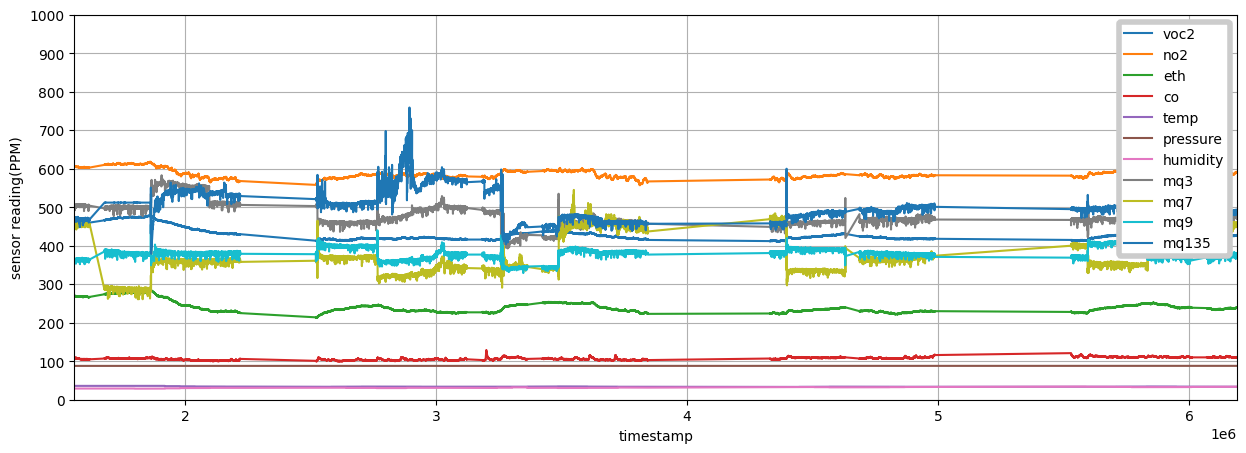

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
final_list = total_dataset
plt.figure(figsize=(15, 5))

for feature in final_list.columns:
    if feature != 'timestamp' and feature != 'label':  
        sns.lineplot(x='timestamp', y=feature, data=final_list, label=feature)

plt.ylabel("Sensors Reading (PPM)")
plt.ylim(0, 1000)
plt.yticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])

plt.xlim(final_list['timestamp'].min(), final_list['timestamp'].max())

plt.xlabel('timestamp')
plt.ylabel('sensor reading(PPM)')

# Add legend with opaque background and set its location to the top right
legend = plt.legend(loc='upper right')
legend.get_frame().set_alpha(1)
legend.get_frame().set_linewidth(4)


plt.grid()
# plt.savefig("all_Cardamom.png")

plt.show()
